<a href="https://colab.research.google.com/github/The-bag/CIS-2100-PROJECT-3/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cell 1: Imports and Setup


In [47]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Load sales data from a drive
from google.colab import drive
drive.mount('/content/drive')

sales_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_data.csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cell 2: Best-Selling Items Per Store


In [48]:
# 1. Best-Selling Items Per Store
print("Best-Selling Items for Each Store")
best_selling_per_store = sales_df.groupby(['StoreID', 'ProductName']).size().reset_index(name='Count')
best_selling_per_store = best_selling_per_store.sort_values(['StoreID', 'Count'], ascending=[True, False])

# Display top-selling items for each store
for store in sales_df['StoreID'].unique():
    print(f"\nStore: {store}")
    print(best_selling_per_store[best_selling_per_store['StoreID'] == store].head(10))


Best-Selling Items for Each Store

Store: Store001
    StoreID  ProductName  Count
2  Store001  Thingamajig     82
3  Store001       Widget     82
0  Store001       Doodad     74
1  Store001       Gadget     67

Store: Store002
    StoreID  ProductName  Count
6  Store002  Thingamajig     84
4  Store002       Doodad     79
7  Store002       Widget     79
5  Store002       Gadget     73


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cell 3: Best-Selling Items Across the Entire Organization



Best-Selling Items Across All Stores
ProductName
Thingamajig    166
Widget         161
Doodad         153
Gadget         140
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


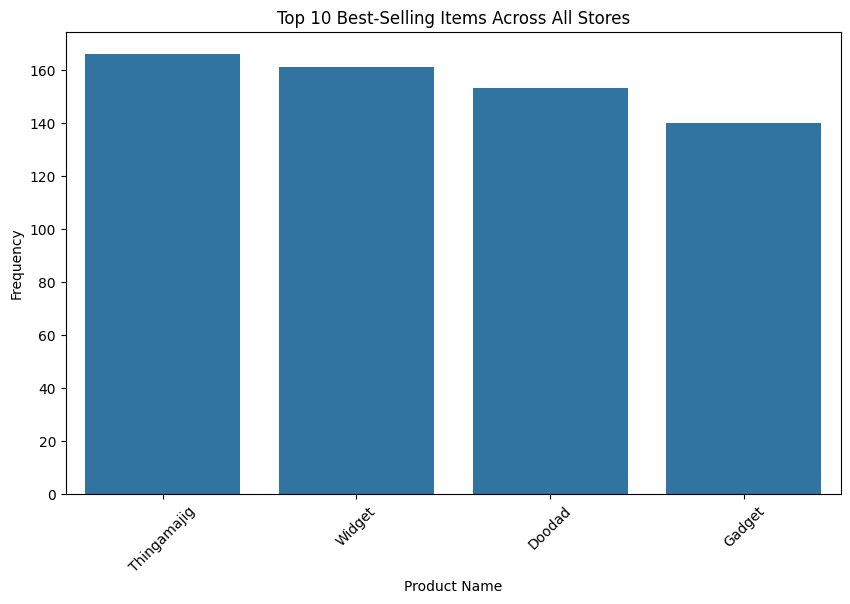

In [49]:
# 2. Best-Selling Items Across the Entire Organization
print("\nBest-Selling Items Across All Stores")
organization_best_selling = sales_df['ProductName'].value_counts().head(10)
print(organization_best_selling)

# Visualization of best-selling items across all stores
plt.figure(figsize=(10, 6))
sns.barplot(x=organization_best_selling.index, y=organization_best_selling.values)
plt.title("Top 10 Best-Selling Items Across All Stores")
plt.xlabel("Product Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


Cell 4: Market Basket Analysis - Frequent Itemsets

In [50]:
# 3. Market Basket Analysis - Frequent Itemsets
# Convert sales data into a transactional format
basket = sales_df.groupby(['OrderID', 'ProductName'])['Price'].count().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Find frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

print("\nFrequent Itemsets")
print(frequent_itemsets.head(10))



Frequent Itemsets
    support               itemsets
2  0.604061          (Thingamajig)
3  0.598985               (Widget)
0  0.543147               (Doodad)
1  0.527919               (Gadget)
6  0.350254       (Doodad, Widget)
9  0.345178  (Thingamajig, Widget)
8  0.314721       (Gadget, Widget)
5  0.309645  (Thingamajig, Doodad)
4  0.274112       (Doodad, Gadget)
7  0.274112  (Thingamajig, Gadget)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-50-9388efa91194>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Cell 5: Association Rules

In [51]:
# 4. Association Rules
# Specify num_itemsets in the association_rules function
num_itemsets = len(frequent_itemsets)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=num_itemsets)
rules = rules[rules['antecedents'].apply(lambda x: len(x)) + rules['consequents'].apply(lambda x: len(x)) == frequent_itemsets['itemsets'].map(len).iloc[0]]
rules = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

print("\nAssociation Rules")
print(rules.head(10))



Association Rules
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cell 6: Visualization of the Top 10 Frequent Itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


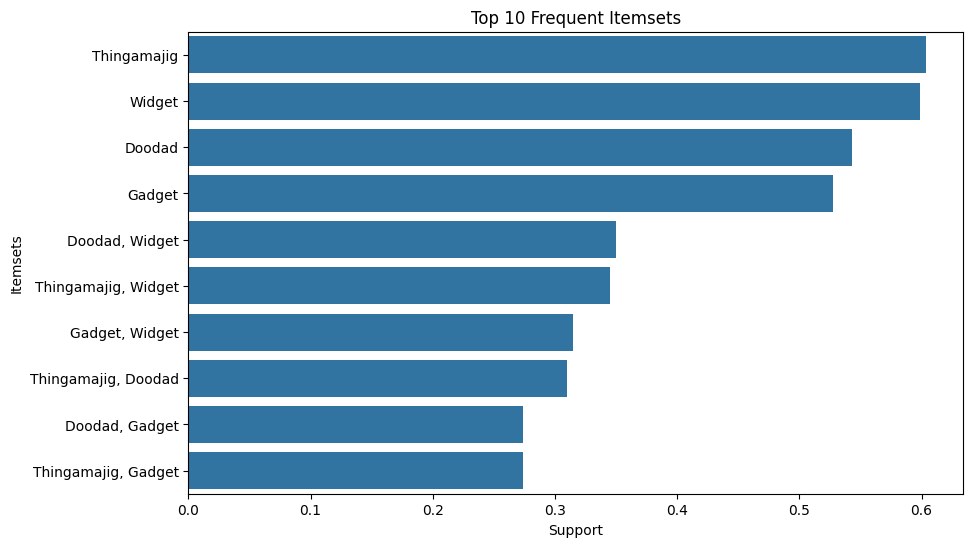

In [52]:
# Visualization of the top 10 frequent itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x=frequent_itemsets['support'].head(10), y=frequent_itemsets['itemsets'].head(10).apply(lambda x: ', '.join(x)))
plt.title("Top 10 Frequent Itemsets")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()


Cell 7: Analysis of Store-Specific Trends

In [53]:
# 5. Market Basket Analysis for Each Store
# Market basket analysis for each store
for store in sales_df['StoreID'].unique():
    print(f"\nMarket Basket Analysis for Store: {store}")
    store_data = sales_df[sales_df['StoreID'] == store]
    store_basket = store_data.groupby(['OrderID', 'ProductName'])['Price'].count().unstack().fillna(0)
    store_basket = store_basket.applymap(lambda x: 1 if x > 0 else 0)

    store_frequent_itemsets = apriori(store_basket, min_support=0.05, use_colnames=True)
    store_frequent_itemsets = store_frequent_itemsets.sort_values(by='support', ascending=False)

    print("Frequent Itemsets:")
    print(store_frequent_itemsets.head(10))

    # Fix: Add num_itemsets to the association_rules function
    num_itemsets = len(store_frequent_itemsets)
    store_rules = association_rules(store_frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=num_itemsets)
    store_rules = store_rules[store_rules['antecedents'].apply(lambda x: len(x)) + store_rules['consequents'].apply(lambda x: len(x)) == store_frequent_itemsets['itemsets'].map(len).iloc[0]]
    store_rules = store_rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

    print("Association Rules:")
    print(store_rules.head(10))



Market Basket Analysis for Store: Store001
Frequent Itemsets:
   support               itemsets
3     0.61               (Widget)
2     0.58          (Thingamajig)
0     0.53               (Doodad)
1     0.51               (Gadget)
9     0.37  (Thingamajig, Widget)
6     0.32       (Doodad, Widget)
8     0.30       (Gadget, Widget)
5     0.28  (Thingamajig, Doodad)
4     0.26       (Doodad, Gadget)
7     0.26  (Thingamajig, Gadget)
Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []

Market Basket Analysis for Store: Store002
Frequent Itemsets:
    support               itemsets
2  0.622449          (Thingamajig)
3  0.581633               (Widget)
0  0.551020               (Doodad)
1  0.540816               (Gadget)
6  0.367347       (Doodad, Widget)
5  0.326531  (Thingamajig, Doodad)
8  0.326531       (G

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-53-f20c406f6fb6>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  store_basket = store_basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
<ipython-input-53-f20c406f6fb6>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  store_basket = store_basket.applymap(lambda x: 1 if x > 0

Cell 8: Save Results

In [54]:
# Save results
frequent_itemsets.to_csv('/content/drive/MyDrive/frequent_itemsets.csv', index=False)
rules.to_csv('/content/drive/MyDrive/association_rules.csv', index=False)

print("\nAnalysis Complete. Results saved to 'frequent_itemsets.csv' and 'association_rules.csv'.")



Analysis Complete. Results saved to 'frequent_itemsets.csv' and 'association_rules.csv'.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
